In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import STL

sns.set_theme('notebook')

In [45]:
df = pd.read_csv('Co2 dataset.csv')
df.head()

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
0,1958,1,1958.0411,NaN,NaN,NaN,NaN
1,1958,2,1958.1260,NaN,NaN,NaN,NaN
2,1958,3,1958.2027,315.69,314.42,316.18,314.89
3,1958,4,1958.2877,317.45,315.15,317.30,314.98
4,1958,5,1958.3699,317.50,314.73,317.83,315.06


## 1. Przeprowadź dekompozycję szeregu czasowego za pomocą metody STL, korzystając z modułu dostępnego w bibliotece statsmodels

In [46]:
ind_series = df.Year.astype(str) + '-' + df.Month.astype(str).str.zfill(2)
df.index = pd.to_datetime(ind_series)

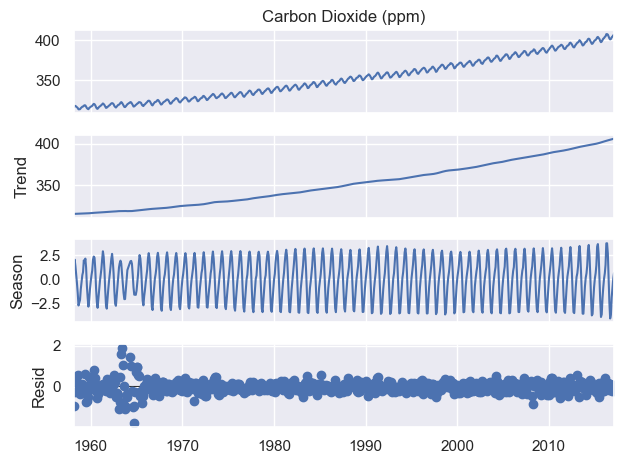

In [54]:
res = STL(df['Carbon Dioxide (ppm)'].dropna(), period=12).fit()

res.plot()
plt.show()

## 2. Przeprowadź testy dla różnych wartości parametrów period i seasonal, a następnie spisz swoje obserwacje z przeprowadzonych badań.

periods: 2


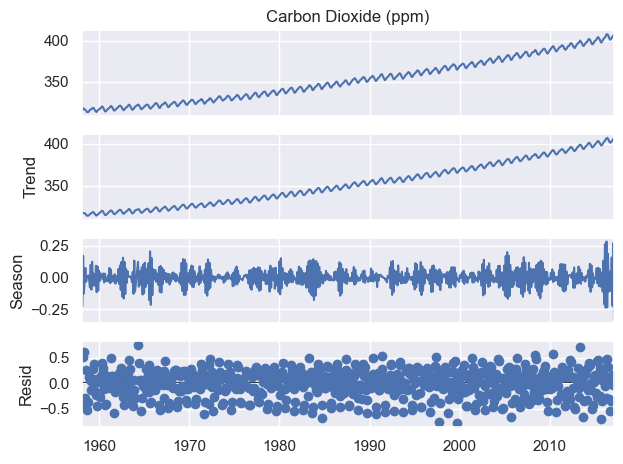

periods: 3


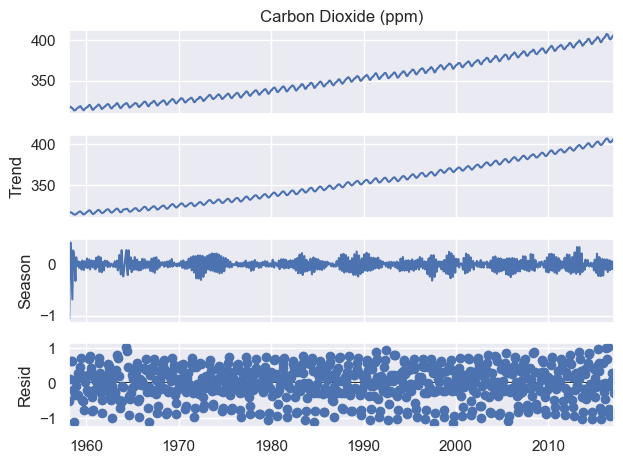

periods: 4


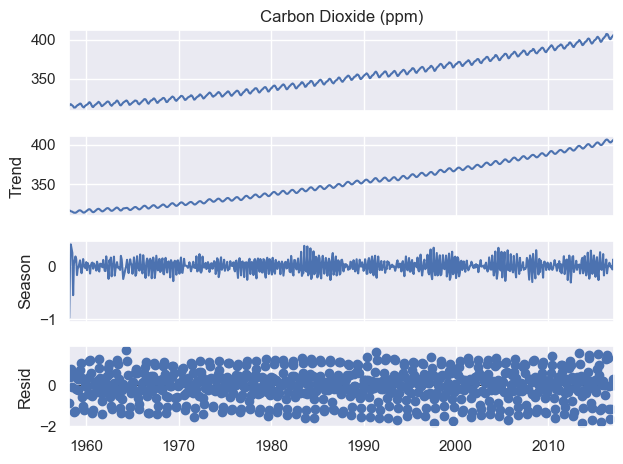

periods: 6


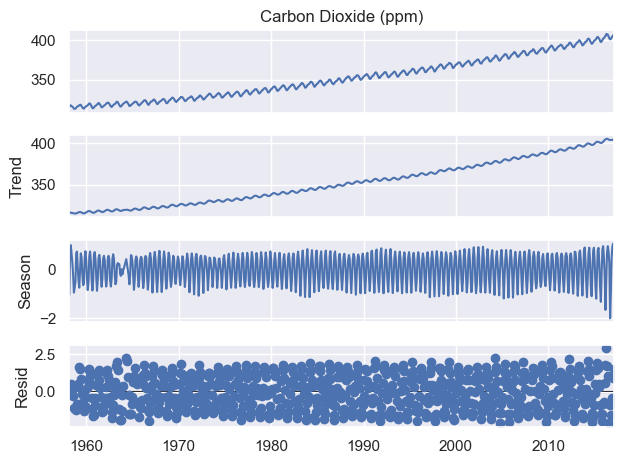

periods: 12


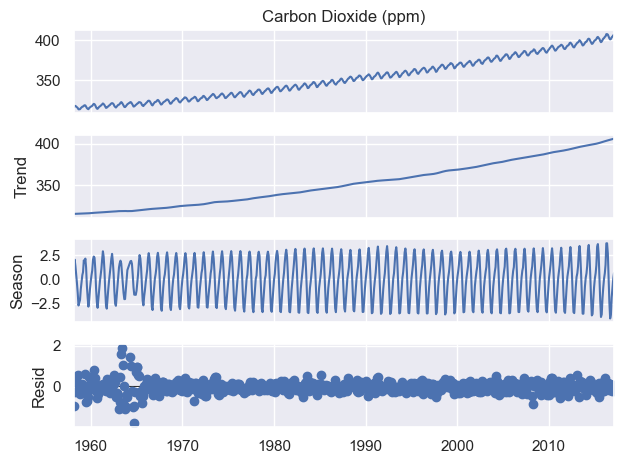

periods: 15


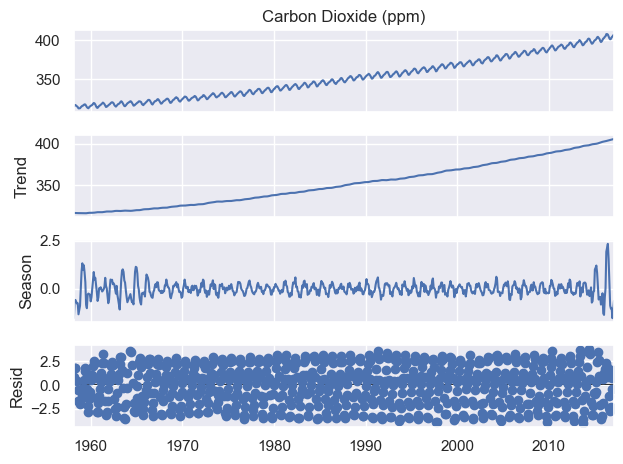

periods: 24


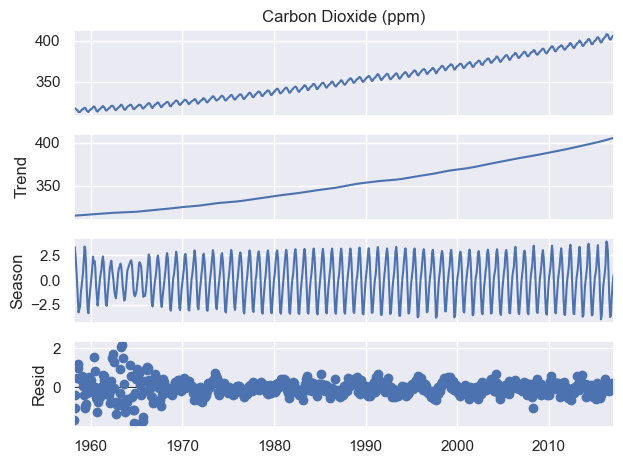

In [48]:
periods = [2, 3, 4, 6, 12, 15, 24]

for period in periods:
    res = STL(df['Carbon Dioxide (ppm)'].dropna(), period=period).fit()

    print(f'periods: {period}')
    res.plot()
    plt.show()

W przypadku ilości okresów innej niż prawdziwa:
- w przypadku mniejszej ilości mocno psuje nam się trend oraz sezonowość - trend jest podobny do początkowego wykresu, w związku z czym wszystkie następne parametry się psują
- jeśli liczba okresów jest większa - nie wygląda to zbyt groźnie (o ile jest to wielokrotność dobrej liczby okresów), różnice są tylko na rezyduach

season: 3


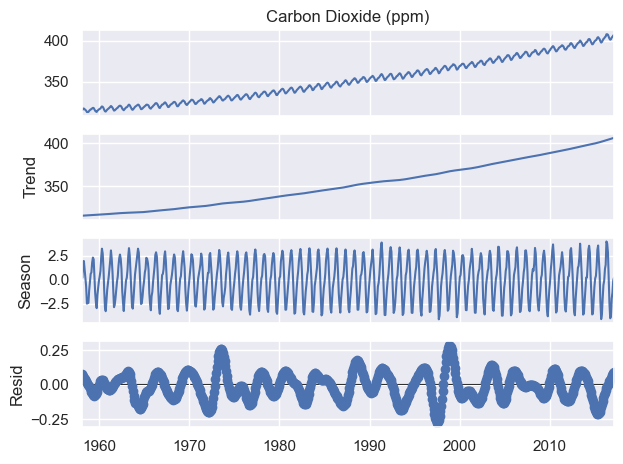

season: 5


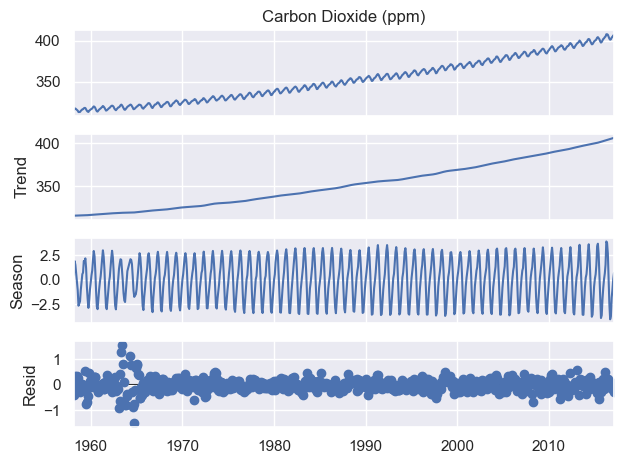

season: 7


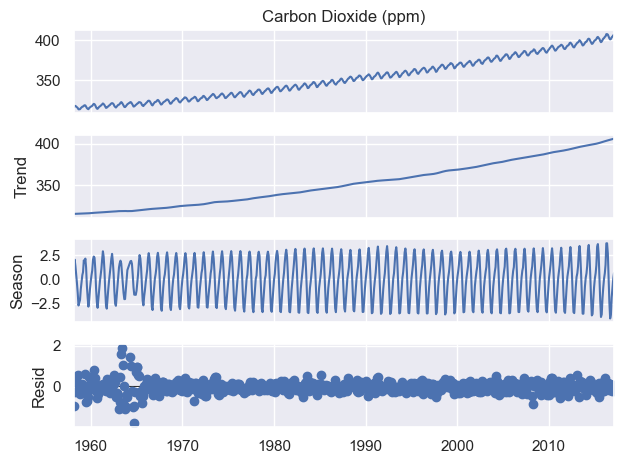

season: 9


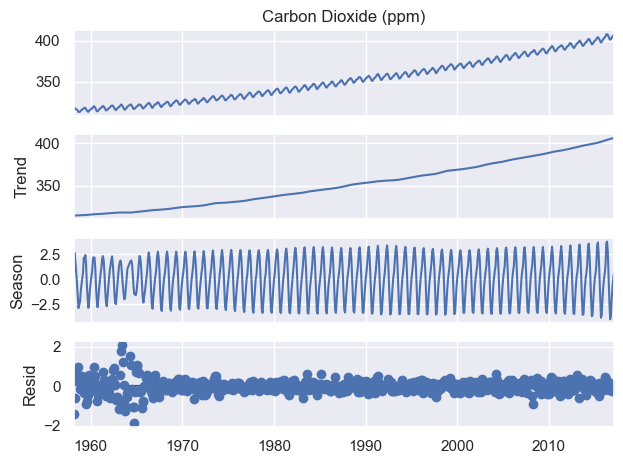

season: 11


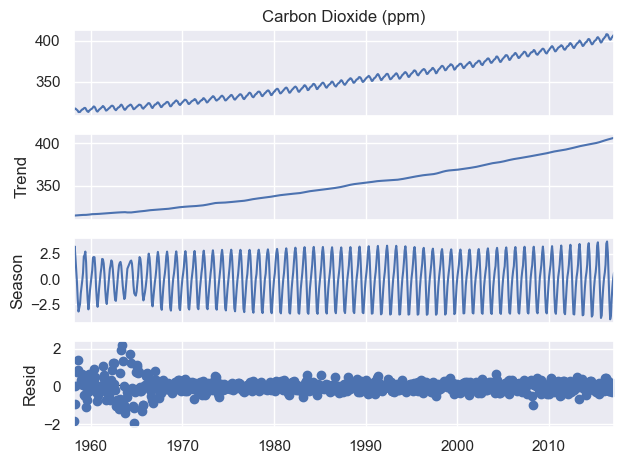

In [49]:
seasonals = [3, 5, 7, 9, 11]

for season in seasonals:
    res = STL(df['Carbon Dioxide (ppm)'].dropna(), seasonal=season, period=12).fit()

    print(f'season: {season}')
    res.plot()
    plt.show()

Parametr seasonal określa, z jakiego obszaru należy wyrównywać komponent sezonowy. Różnice w wynikach widać w rezyduach. W tym przypadku najlepszy okazał się parametr '5', ale w przypadku innych zbiorów danych może to być inny wynik.

## 3. Zbadaj różnice w magnitudzie sezonowości pomiędzy stałą a zmienną w czasie (parametr seasonal_deg równy 0 oznacza stałą magnitudę sezonową w czasie). Przedstaw opis wyników swoich badań.

Constant seasonal LOESS


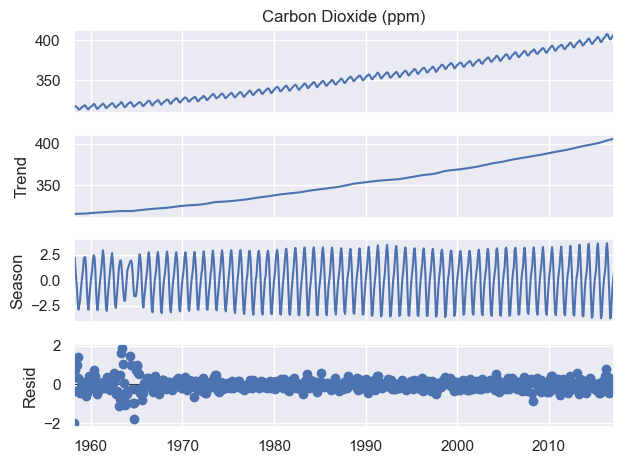

Constant and trend


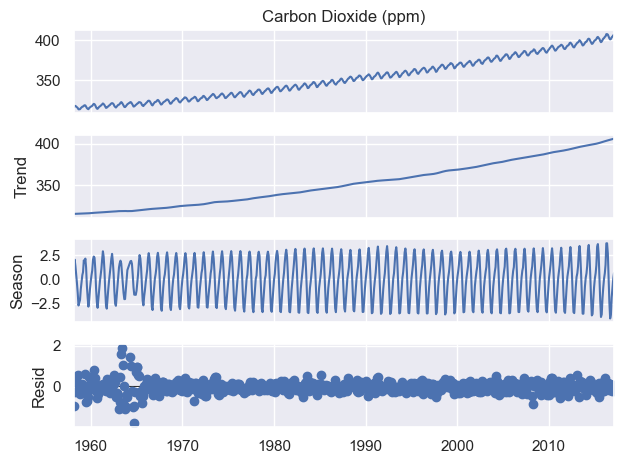

In [50]:
deg = [0,1]

for d in deg:

    res = STL(df['Carbon Dioxide (ppm)'].dropna(), seasonal_deg=d, period=12).fit()

    if d == 0:
        print('Constant seasonal LOESS')
    else:
        print('Constant and trend')
    res.plot()
    plt.show()

Różnice między stałą a zmienną w czasie magnitudą nie są zbyt duże, ale można zauważyć, że w przypadku magnitudy zmiennej w czasie występują mniejsze efekty brzegowe

## 4. Na podstawie wykonanych ćwiczeń z dekompozycji tradycyjnej oraz punktów 1-3 dzisiejszego ćwiczenia, zaleć, którą dekompozycję i dlaczego warto wykorzystać do generowania cech do modelu uczenia maszynowego.

O ile tradycyjna dekompozycja jest prostsza w wykonaniu, interpretycji i mniej obciążająca obliczeniowo, o tyle dekompozycja STL zazwyczaj daje lepsze wyniki. W przypadku tych danych, które nie są zbyt skomplikowane, różnice nie są duże, ale jeśli byłyby to dane np. ze zmiennym trendem w czasie STL byłoby o wiele efektywniejsze. Dekompozycja STL z odpowiednimi parametrami daje lepsze wyniki, chociaż sam proces doboru parametrów może być w niektórych przypadkach uciążliwy. Niemniej jednak, uważam że zawsze najlepiej używać narzędzi dających najlepsze możliwe wyniki, więc wybrałabym metodę STL.

## 5. Dokonaj interpretacji trendu, sezonowości oraz reszt dla dekompozycji, która Twoim zdaniem przynosi najbardziej optymalne wyniki.

Najlepsza dekompozycja wg mnie to:
- STL
- period 12
- seasonal 5
- Magnituda zmienna w czasie

W przypadku dekompozycji tradycyjnej nie mamy dziwnego peaku w okolicach roku 1965, ale mimo to wydaje mi się, że wyniki są lepsze przy użyciu metody STL

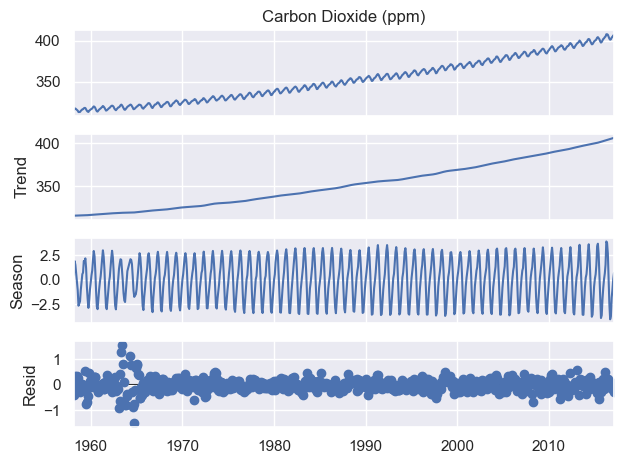

In [51]:
res = STL(df['Carbon Dioxide (ppm)'].dropna(), seasonal_deg=1, period=12, seasonal=5).fit()

res.plot()
plt.show()

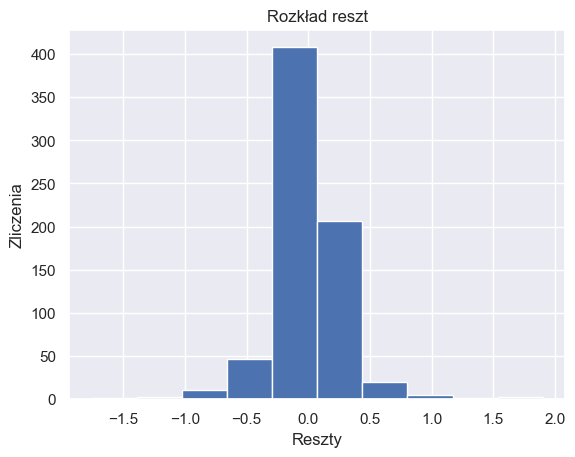

In [59]:
ax = res.resid.hist()
ax.set(title='Rozkład reszt', ylabel='Zliczenia', xlabel='Reszty')
plt.show()

Interpretacja:
- Trend - stale rosnący na przestrzeni lat, z delikatnie zwiększającym się tempem wzrostu wraz z upływem czasu
- Sezonowość - stała w czasie poza rokiem 1965, kiedy metoda STL się gubi (z nieznanych dla mnie przyczyn), delikatne wachania koło roku 1990, kiedy sezonowe różnice się zwiększyły
- Reszty - w miare stabilnie stałe (jak widać na powyższym histogramie), orbitujące wokół wartości 0, z większymi wartościami tylko w roku 1965